In [303]:

#Import key libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

In [358]:
### Let's  Logistic Regression 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score,roc_curve
from sklearn import metrics

In [359]:
train_df = pd.read_csv('train_modified.csv',index_col='PassengerId')
train_df.drop(columns=['Age','Fare','Embarked_Q','Cabintype_2.0','Cabintype_1.0',
                       'Cabintype_3.0','Pclass_2','Cabintype_4.0','alone_1'],axis=1,inplace=True)

In [417]:
regr = LogisticRegression(solver='saga')
target = train_df['Survived']

In [418]:
def auc(variables, target, basetable):
    X = basetable[variables].values
    y = basetable[target].values.astype(int)
    regr.fit(X, y)
    predictions = regr.predict_proba(X)[:,1]
    auc = roc_auc_score(y, predictions)
    return(auc)

#auc = auc(features, target, train_df)

def next_best(current_variables,candidate_variables, target, basetable):
    best_auc = -1
    best_variable = None
    for v in candidate_variables:
        auc_v = auc(current_variables + [v], target, basetable)
        if auc_v >= best_auc: 
            best_auc = auc_v
            best_variable = v
    return best_variable

features = list(set(train_df.columns) - set(['Survived']))
target = 'Survived'
current_variables = []
candidate_variables = features
iterations=30
varcount = min(iterations, len(candidate_variables))
for i in range(0,varcount):
    next_var = next_best(current_variables,candidate_variables, target, train_df)
    current_variables = current_variables + [next_var]
    candidate_variables.remove(next_var)
list_of_features= current_variables

def auc_values(variables, target, table):
    
    auc_values = []
    variables_evaluate = []
    for v in variables:
        variables_evaluate.append(v)
        auc_value = auc(variables_evaluate, target, table)
        auc_values.append(auc_value)
    return auc_values

auc_values_by_features = auc_values(list_of_features, target, train_df)
print(list_of_features)

['Sex_1', 'Pclass_3', 'Age_categories_Infant', 'Embarked_S', 'SibSp', 'Cabintype_6.0', 'Cabintype_5.0', 'Age_categories_Child', 'Age_categories_Adult', 'Age_categories_Teenager', 'Age_categories_Young Adult', 'Age_categories_Senior', 'Parch']


In [419]:
print(auc_values_by_features)

[0.7658007728638901, 0.8236340704164877, 0.8352431300987548, 0.8445013954486904, 0.8509714469729497, 0.8554395663374839, 0.862628810648347, 0.8650520609703736, 0.8663401674538429, 0.8661093817088878, 0.8661550021468442, 0.8660637612709319, 0.8667588020609703]


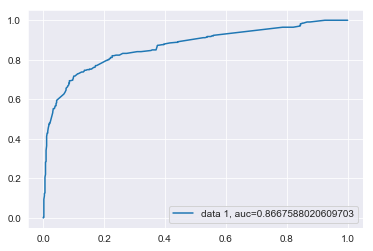

In [420]:
##ROC
X = train_df[list_of_features].values
y = train_df[target].values.astype(int)
y_pred_proba = regr.predict_proba(X)[::,1]
fpr, tpr, _ = metrics.roc_curve(y,  y_pred_proba)
auc = metrics.roc_auc_score(y, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()



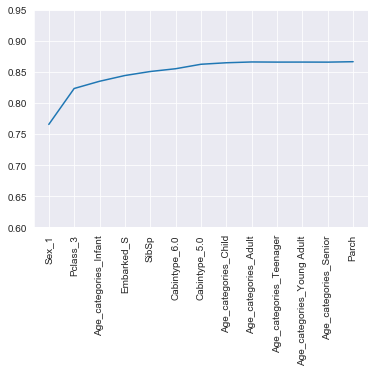

In [421]:
# Make plot of the AUC values
x = np.array(range(0,len(auc_values_by_features)))
plt.xticks(x, list_of_features, rotation = 90)
plt.plot(x,auc_values_by_features)
plt.ylim((0.6, 0.95))
plt.show()

In [422]:
#Now Predict
X = train_df[list_of_features]
y= train_df[target]
regr.fit(X,y)
y_pred = regr.predict(X)
y_pred_proba = regr.predict_proba(X)#[:,1]

In [423]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y, regr.predict_proba(X)[:,1])
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.8667588020609703


Accuracy Score:  0.829954954954955
JAccard Accuracy Score:  0.829954954954955
Probablity of prediction to be 1 or Yes:  6.0



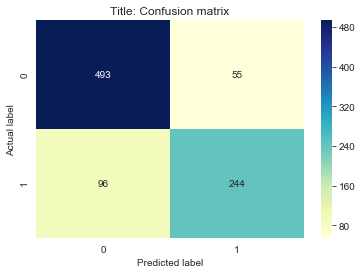

In [440]:
sns.heatmap(pd.DataFrame(confusion_matrix(y,y_pred)), 
            annot=True, cmap="YlGnBu" ,fmt='g')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Title: Confusion matrix')

print('Accuracy Score: ', metrics.accuracy_score(y, y_pred))

from sklearn.metrics import jaccard_similarity_score
print('JAccard Accuracy Score: ', jaccard_similarity_score(y, y_pred))

from sklearn.metrics import log_loss
print("Probablity of prediction to be 1 or Yes: ", round(log_loss(y, y_pred)))
print("")

In [425]:
## Model Accuracy - Features P Values and Confidence Intervals
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.424970
         Iterations 7
                              Results: Logit
Model:                  Logit               Pseudo R-squared:    0.361     
Dependent Variable:     Survived            AIC:                 780.7476  
Date:                   2019-01-01 21:43    BIC:                 843.0042  
No. Observations:       888                 Log-Likelihood:      -377.37   
Df Model:               12                  LL-Null:             -590.93   
Df Residuals:           875                 LLR p-value:         6.8203e-84
Converged:              1.0000              Scale:               1.0000    
No. Iterations:         7.0000                                             
---------------------------------------------------------------------------
                            Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------------
Sex_1            

In [430]:
print(classification_report(y,y_pred))



              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87       548
         1.0       0.82      0.72      0.76       340

   micro avg       0.83      0.83      0.83       888
   macro avg       0.83      0.81      0.82       888
weighted avg       0.83      0.83      0.83       888



0.829954954954955

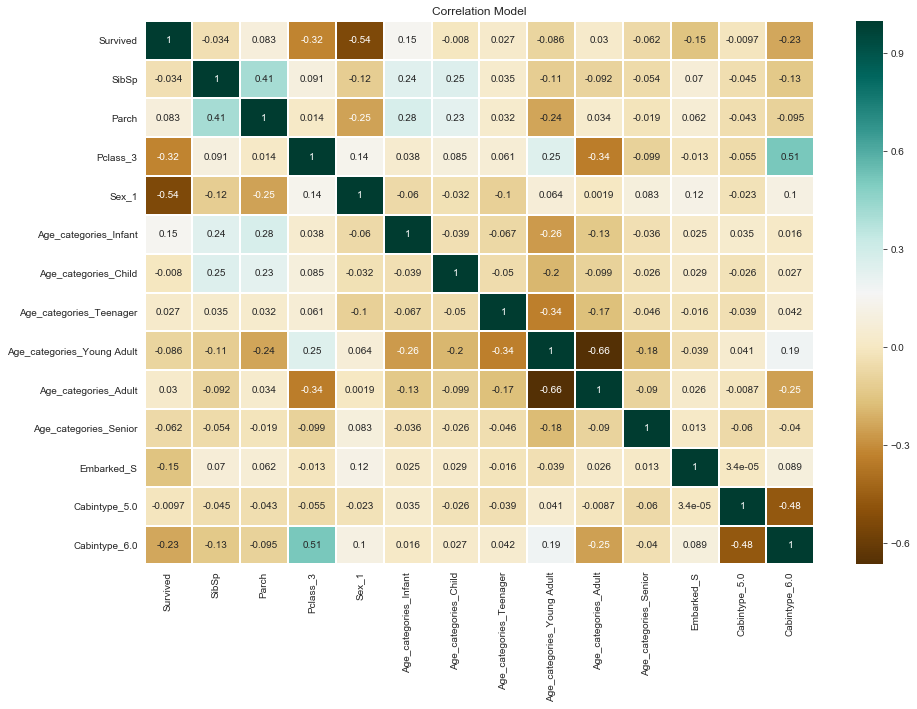

In [427]:
plt.figure(figsize=(15,10))
plt.title("Correlation Model")
sns.heatmap(train_df.corr(),annot=True,cmap="BrBG",linewidth=1)

In [428]:
print('Accuracy Score: ', metrics.accuracy_score(y, y_pred))

Accuracy Score:  0.829954954954955


(array([-3., -2., -1.,  0.,  1.,  2.,  3.]),
 <a list of 7 Text xticklabel objects>)

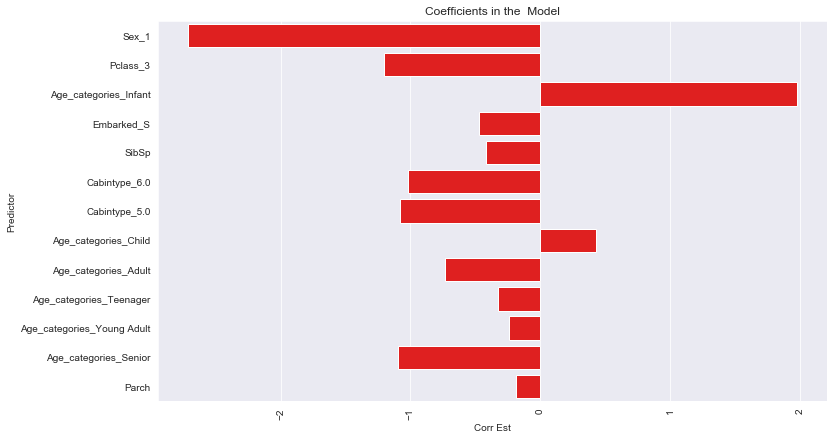

In [403]:
features_coe = pd.DataFrame(list_of_features)
features_coe.columns = ['Predictor']
features_coe['Corr Est'] = regr.coef_[0]
#features_coe.sort_values(by='Corr Est', ascending=False)

plt.figure(figsize=(12,7))
plt.title("Coefficients in the  Model")
sns.barplot(y='Predictor',x='Corr Est',data=features_coe,color='red',label='Coefficient Value')
plt.xticks(x=list_of_features, rotation = 90)

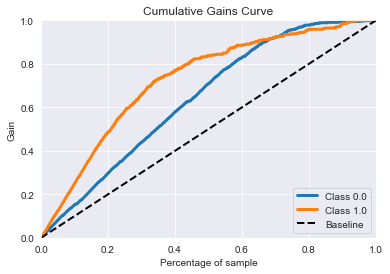

In [404]:
## Cumulative Gains Curve
import scikitplot as skplt
import matplotlib.pyplot as plt
skplt.metrics.plot_cumulative_gain(y, pd.DataFrame(y_pred_proba))
plt.show()

In [405]:
df = pd.DataFrame(y_pred_proba)

In [406]:
df.columns = ['Not Survived','Survived']